<a href="https://colab.research.google.com/github/amf599-cyber/N-Body_Test/blob/main/Test-Data-Analysis-v1-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/particle_accelerations.csv')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Display the names of all columns in the DataFrame
print('\nColumn names:')
print(df.columns)

First 5 rows of the DataFrame:
    delta_x   delta_y   delta_z     acc_x    acc_y     acc_z     pot_x  \
0  0.480802  0.914920  0.467958  -501.828  5244.61   384.858   5831.41   
1  0.384588  0.293847  0.840969 -1319.880 -1020.79  3205.680  26622.30   
2  0.878550  0.611567  0.403323  4269.270  1015.81  -141.712 -44849.80   
3  0.631973  0.348527  0.817951   933.642 -2236.17  1992.850 -25691.90   
4  0.004905  0.357012  0.001457 -2961.630  -104.47 -2987.100   9228.83   

       pot_y     pot_z  
0 -60944.100  -4472.18  
1  20589.600 -64659.40  
2 -10671.300   1488.71  
3  61534.600 -54839.00  
4    325.543   9308.20  

Column names:
Index(['delta_x', 'delta_y', 'delta_z', 'acc_x', 'acc_y', 'acc_z', 'pot_x',
       'pot_y', 'pot_z'],
      dtype='object')


In [2]:
import numpy as np

# Calculate radius magnitude
df['radius_magnitude'] = np.sqrt(df['delta_x']**2 + df['delta_y']**2 + df['delta_z']**2)

# Calculate acceleration magnitude
df['acceleration_magnitude'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)

# Calculate potential magnitude
df['potential_magnitude'] = np.sqrt(df['pot_x']**2 + df['pot_y']**2 + df['pot_z']**2)

# Display the first few rows with the new magnitude columns
print("DataFrame with new magnitude columns:")
print(df.head())

DataFrame with new magnitude columns:
    delta_x   delta_y   delta_z     acc_x    acc_y     acc_z     pot_x  \
0  0.480802  0.914920  0.467958  -501.828  5244.61   384.858   5831.41   
1  0.384588  0.293847  0.840969 -1319.880 -1020.79  3205.680  26622.30   
2  0.878550  0.611567  0.403323  4269.270  1015.81  -141.712 -44849.80   
3  0.631973  0.348527  0.817951   933.642 -2236.17  1992.850 -25691.90   
4  0.004905  0.357012  0.001457 -2961.630  -104.47 -2987.100   9228.83   

       pot_y     pot_z  radius_magnitude  acceleration_magnitude  \
0 -60944.100  -4472.18          1.134563             5282.601733   
1  20589.600 -64659.40          0.970300             3613.928569   
2 -10671.300   1488.71          1.143912             4390.742372   
3  61534.600 -54839.00          1.090828             3137.450362   
4    325.543   9308.20          0.357049             4207.722977   

   potential_magnitude  
0         61385.576981  
1         72893.871442  
2         46125.887105  
3       

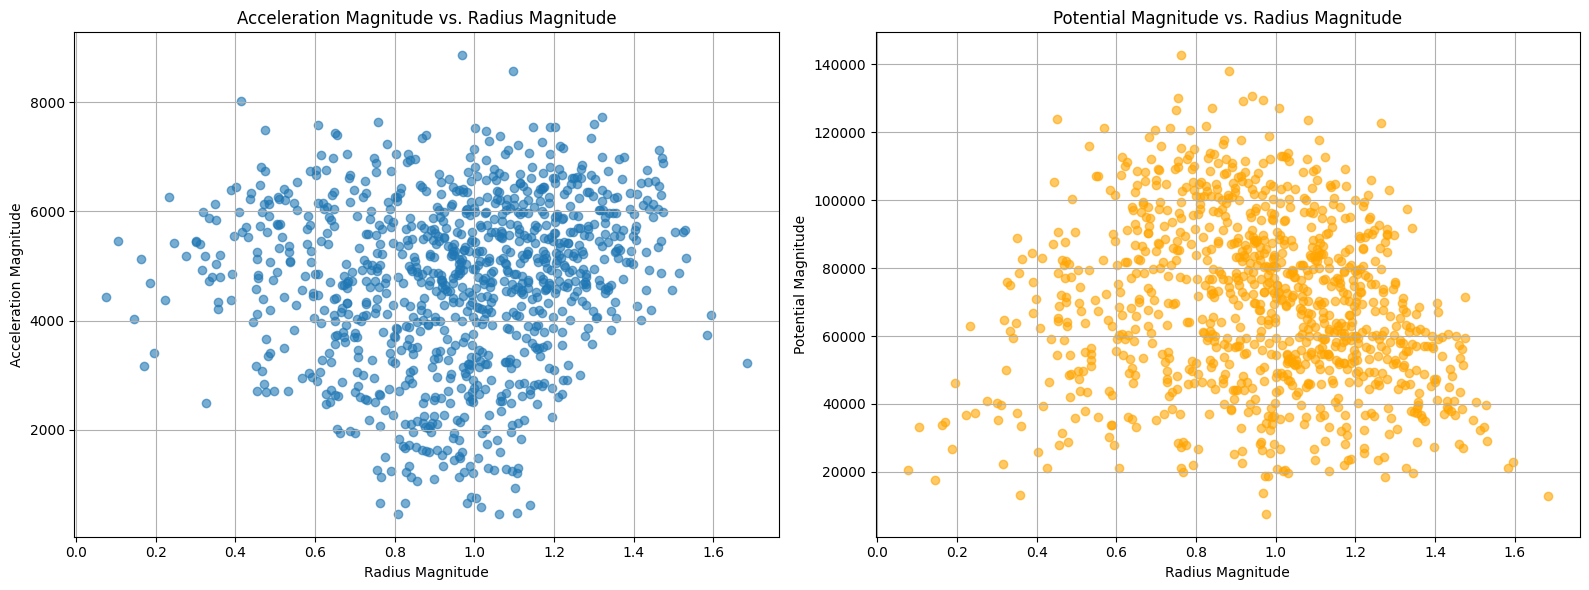

In [3]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Acceleration Magnitude vs. Radius Magnitude
axes[0].scatter(df['radius_magnitude'], df['acceleration_magnitude'], alpha=0.6)
axes[0].set_title('Acceleration Magnitude vs. Radius Magnitude')
axes[0].set_xlabel('Radius Magnitude')
axes[0].set_ylabel('Acceleration Magnitude')
axes[0].grid(True)

# Plot 2: Potential Magnitude vs. Radius Magnitude
axes[1].scatter(df['radius_magnitude'], df['potential_magnitude'], alpha=0.6, color='orange')
axes[1].set_title('Potential Magnitude vs. Radius Magnitude')
axes[1].set_xlabel('Radius Magnitude')
axes[1].set_ylabel('Potential Magnitude')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [4]:
particle_positions = df[['delta_x', 'delta_y', 'delta_z']]

print('First 5 rows of particle_positions:')
print(particle_positions.head())

First 5 rows of particle_positions:
    delta_x   delta_y   delta_z
0  0.480802  0.914920  0.467958
1  0.384588  0.293847  0.840969
2  0.878550  0.611567  0.403323
3  0.631973  0.348527  0.817951
4  0.004905  0.357012  0.001457


In [5]:
from scipy.spatial import distance
import numpy as np

# Get the number of particles
num_particles = len(particle_positions)
print(f"Total number of particles: {num_particles}")

# Initialize an empty list to store the calculated distances
separation_distances = []

# Loop through all unique pairs of particles
# We use a nested loop, ensuring i < j to get unique pairs and avoid calculating distance of a particle with itself
for i in range(num_particles):
    for j in range(i + 1, num_particles):
        # Extract the 3D coordinates for particle i and particle j
        pos_i = particle_positions.iloc[i].values
        pos_j = particle_positions.iloc[j].values

        # Calculate the Euclidean distance between the two particles' coordinates
        dist = distance.euclidean(pos_i, pos_j)

        # Append the calculated distance to the separation_distances list
        separation_distances.append(dist)

# Convert the separation_distances list into a NumPy array
separation_distances = np.array(separation_distances)

# Display the first few distances and the total number of distances calculated
print(f"\nFirst 10 calculated separation distances:\n{separation_distances[:10]}")
print(f"\nTotal number of separation distances calculated: {len(separation_distances)}")

Total number of particles: 1000

First 10 calculated separation distances:
[0.73083925 0.50438497 0.68275091 0.86911581 0.93268856 0.38793725
 0.61355167 0.38036215 0.41951186 0.57514797]

Total number of separation distances calculated: 499500


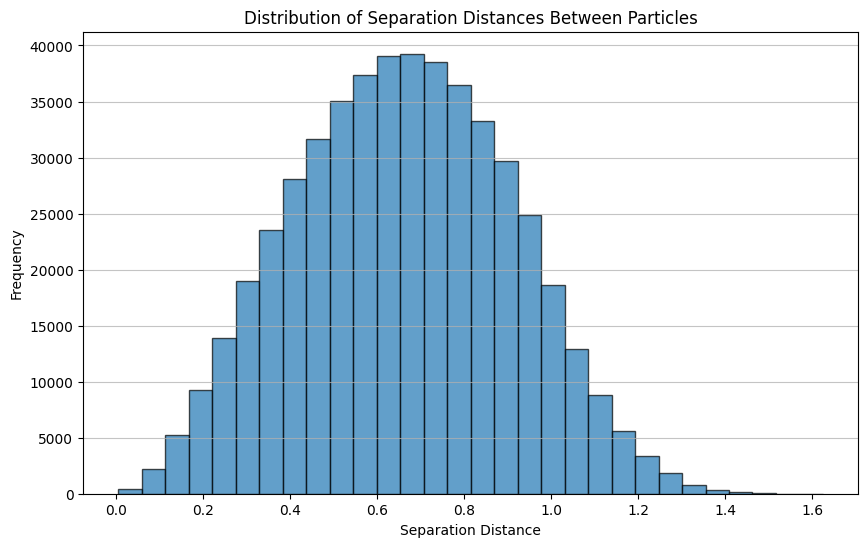

In [6]:
import matplotlib.pyplot as plt

# Create a histogram of separation distances
plt.figure(figsize=(10, 6))
plt.hist(separation_distances, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Separation Distances Between Particles')
plt.xlabel('Separation Distance')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [7]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

# Convert particle_positions DataFrame to a NumPy array for pairwise distance calculation
pos_array = particle_positions.values

# Calculate all pairwise Euclidean distances. pdist returns a condensed distance matrix.
pairwise_distances_condensed = pdist(pos_array)

# Convert the condensed distance matrix to a squareform distance matrix.
# This matrix will be num_particles x num_particles, where element [i, j] is the distance
# between particle i and particle j.
distance_matrix = squareform(pairwise_distances_condensed)

# Initialize an array to store the average separation distance for each particle
average_separation_distance_per_particle = np.zeros(num_particles)

# Loop through each particle to calculate its average separation distance to all others
for i in range(num_particles):
    # Get all distances from particle i to other particles
    # We use np.delete to remove the distance from particle i to itself (which is 0)
    distances_from_i = np.delete(distance_matrix[i, :], i)
    # Calculate the mean of these distances
    average_separation_distance_per_particle[i] = np.mean(distances_from_i)

# Add the calculated average separation distance to the main DataFrame
df['average_separation_distance'] = average_separation_distance_per_particle

print("DataFrame with 'average_separation_distance' column:")
print(df[['radius_magnitude', 'acceleration_magnitude', 'potential_magnitude', 'average_separation_distance']].head())

DataFrame with 'average_separation_distance' column:
   radius_magnitude  acceleration_magnitude  potential_magnitude  \
0          1.134563             5282.601733         61385.576981   
1          0.970300             3613.928569         72893.871442   
2          1.143912             4390.742372         46125.887105   
3          1.090828             3137.450362         86335.952209   
4          0.357049             4207.722977         13111.821714   

   average_separation_distance  
0                     0.612002  
1                     0.604917  
2                     0.608381  
3                     0.585702  
4                     0.830369  


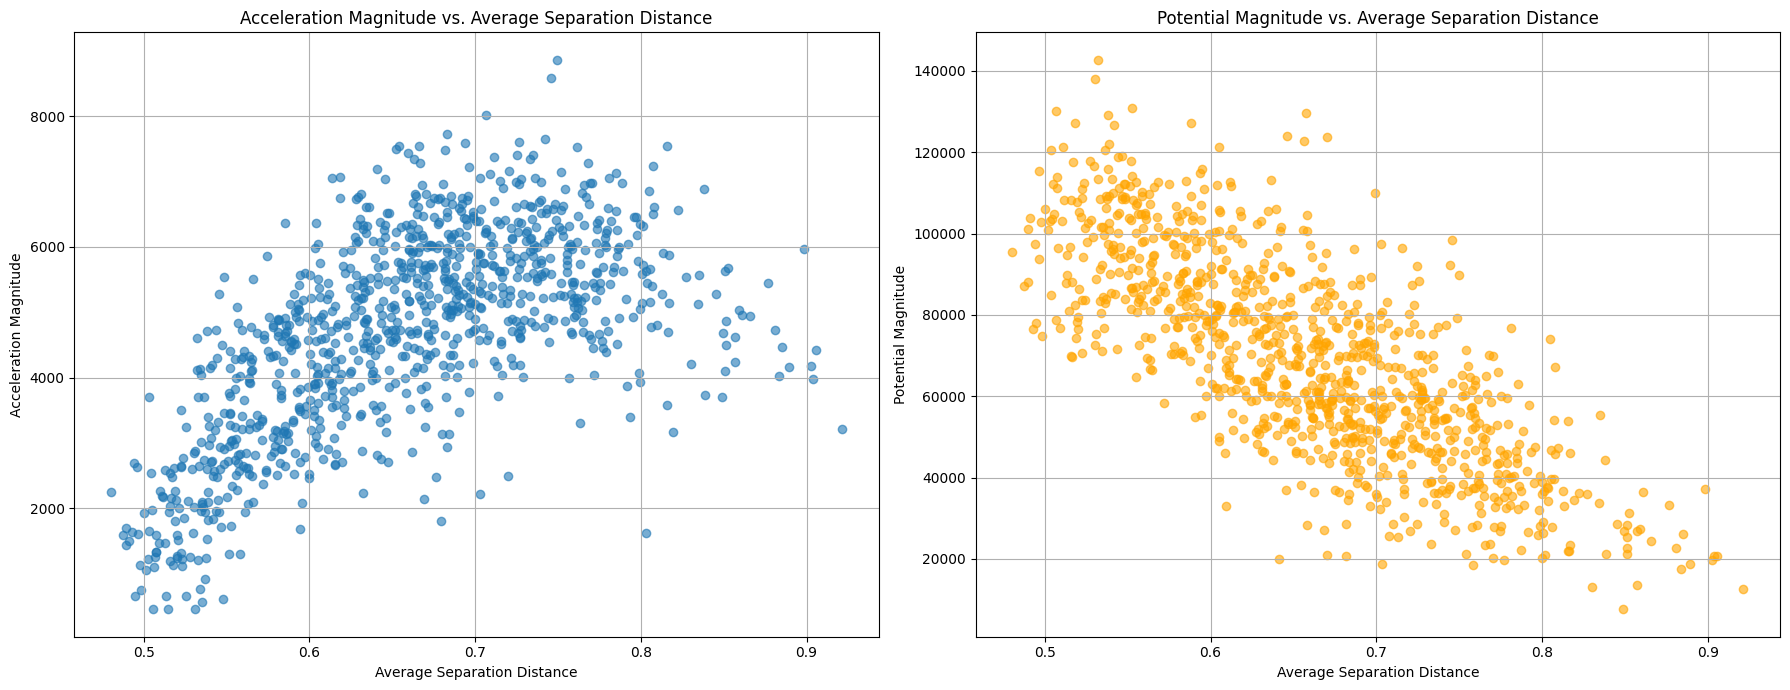

In [8]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Acceleration Magnitude vs. Average Separation Distance
axes[0].scatter(df['average_separation_distance'], df['acceleration_magnitude'], alpha=0.6)
axes[0].set_title('Acceleration Magnitude vs. Average Separation Distance')
axes[0].set_xlabel('Average Separation Distance')
axes[0].set_ylabel('Acceleration Magnitude')
axes[0].grid(True)

# Plot 2: Potential Magnitude vs. Average Separation Distance
axes[1].scatter(df['average_separation_distance'], df['potential_magnitude'], alpha=0.6, color='orange')
axes[1].set_title('Potential Magnitude vs. Average Separation Distance')
axes[1].set_xlabel('Average Separation Distance')
axes[1].set_ylabel('Potential Magnitude')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()